# Integration with HTM

H-transport-materials (HTM) is a python library for accessing hydrogen transport properties such as diffusivities, solubilities, recombination coefficients, etc.

It is an open-source project and contributions to the database are more than welcome!
Many materials are already available: Tungsten, copper, CuCrZr, Flinak, Flibe...

To install HTM simply run:
```
pip install h-transport-materials
```

👉 [GitHub repository](https://github.com/RemDelaporteMathurin/h-transport-materials)

👉 [web dashboard](https://htm-dashboard-uan5l4xr6a-od.a.run.app/)


Now the interesting thing with HTM is that it can be used in FESTIM.

Let's first have a look at the HTM api.

## The HTM library
The diffusivities in the HTM database are stored in `htm.diffusivities`.

They can be filtered by material, isotope, author, year with the `.filter()` method.

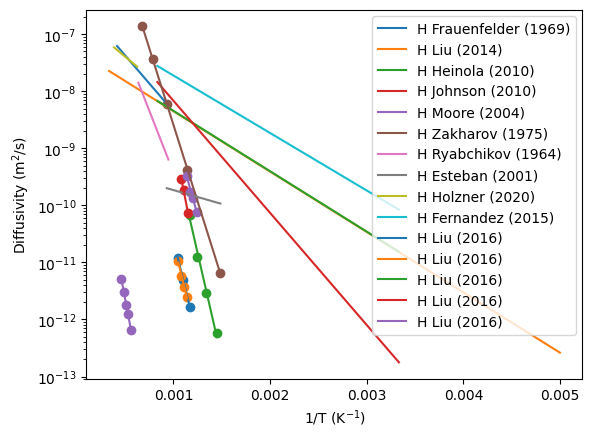

In [1]:
import h_transport_materials as htm

# filter only tungsten and H
diffusivities = htm.diffusivities.filter(material="tungsten").filter(isotope="h")


# plot the properties
htm.plotting.plot(diffusivities)

import matplotlib.pyplot as plt

plt.yscale("log")
plt.ylabel("Diffusivity (m$^2$/s)")
plt.legend()
plt.show()

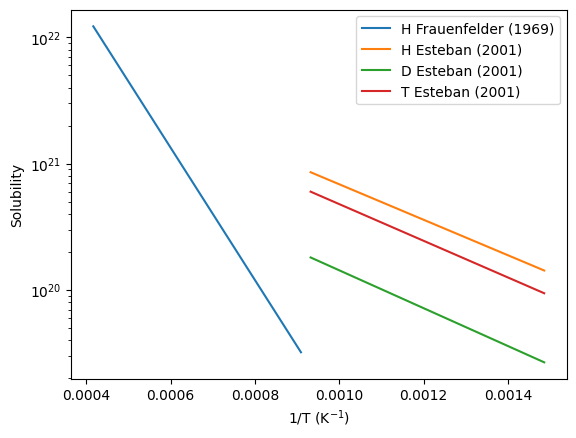

In [2]:
# filter only tungsten and H
solubilities = htm.solubilities.filter(material="tungsten")

htm.plotting.plot(solubilities)


plt.yscale("log")
plt.ylabel("Solubility")
plt.legend()
plt.show()

## FESTIM integration

We want to use the properties of Frauenfelder for tungsten.

Let's therefore filter the properties with `.filter(author="frauenfelder")`.

We can obtain a single `htm.ArrheniusProperty` object:

In [3]:
diffusivities = htm.diffusivities.filter(material="tungsten").filter(isotope="h").filter(author="frauenfelder")
D = diffusivities[0]

print(type(diffusivities))
print(type(D))

<class 'h_transport_materials.properties_group.PropertiesGroup'>
<class 'h_transport_materials.property.Diffusivity'>


A `htm.ArrheniusProperty` object has several useful attributes like `.pre_exp` which holds the pre-exponential factor, `.act_energy` for the activation energy but also `.author` and `.year`.

In [4]:
print(D)


        Author: Frauenfelder
        Material: tungsten
        Year: 1969
        Isotope: H
        Pre-exponential factor: 4.10×10⁻⁷ m²/s
        Activation energy: 3.90×10⁻¹ eV/particle
        


Let's pick a solubility too:

In [5]:
S = htm.solubilities.filter(material="tungsten").filter(author="frauenfelder")[0]

These properties can then be used inside a `FESTIM.Material` object.

This is extremely useful to avoid silly copy-pasting mistakes and typos in simulations.

In [6]:
import festim as F


tungsten = F.Material(
    id=1,
    D_0=D.pre_exp.magnitude, E_D=D.act_energy.magnitude,
    S_0=S.pre_exp.magnitude, E_S=S.act_energy.magnitude
    )